# Identifier les grands consommateurs d'électricité



Dans ce notebook vous trouverez le code source, les visuels produits ainsi que les raisonnements et conclusions que nous avons produits au cours du hackaton.

In [1]:
#bibliotheques usuelles pour extraire des informations d'un csv et les afficher
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Approche 1

En croisant les **consommations électriques** sur un maillage a l'échelle du territoire, nous voulions **estimer les consommations électriques d'entreprises du GICAT**, et s'en servir comme base pour estimer l'ampleur qu'une attaque devait avoir pour être nuisible.

Nous avons utilisé la carte de https://www.gicat.com/membres/ pour identifier les cibles les plus accessibles, pour pouvoir les identifier en évitant trop de bruit provenant d'entreprises de la meme commune.

In [2]:
#fichier que nous avons choisi pour l'approche 1
df = pd.read_csv("data/consommation-annuelle-a-la-maille-adresse-2018-et-2019.csv", sep=";")

Nous avons choisi de consulter les départements de la Moselle ainsi que de l'Yonne, ayant l'un des ratios employés d'entreprises du GICAT/habitants les plus élevés de la metropole.

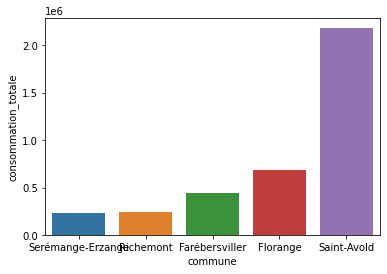

In [3]:
moselle = df[df['departement'] == 'Moselle']
moselle = moselle.dropna(subset=['consommation_totale'])

moselle_by_address = moselle.groupby('commune').mean()
moselle_by_address = moselle_by_address.sort_values(by=['consommation_totale'])

#affiche les 5 plus grandes consommations electriques du departement
moselle_by_address_top_five = moselle_by_address.tail(5)
sns.barplot(x=moselle_by_address_top_five.index, y=moselle_by_address_top_five['consommation_totale'])

plt.show()

*Aie!* 

Nous attendions Metz, Thionville et Distroff étant donne leur population et l'activité, notamment de GICAT.

Or, aucun n'est present dans le top 5...

Regardons donc la consommation totale de Metz, Thionville et Distroff pour les comparer avec notre top 5.

In [4]:
print(moselle_by_address.index)

Index(['Uckange', 'Maizières-lès-Metz', 'Carling', 'Sarrebourg', 'Suisse',
       'Rémilly', 'Saint-Louis-lès-Bitche', 'Cattenom', 'Sarraltroff', 'Metz',
       'Amnéville', 'L'Hôpital', 'Ennery', 'Nilvange', 'Bénestroff', 'Hambach',
       'Hayange', 'Thionville', 'Héming', 'Sarreguemines', 'Sarralbe',
       'Hagondange', 'Serémange-Erzange', 'Richemont', 'Farébersviller',
       'Florange', 'Saint-Avold'],
      dtype='object', name='commune')


En regardant les communes qui apparaissent dans notre dataset, on remarque que Distroff n'apparrait pas. <br/>
On peut en déduire que la consommation de Distroff n'est tout simplement pas renseignée...

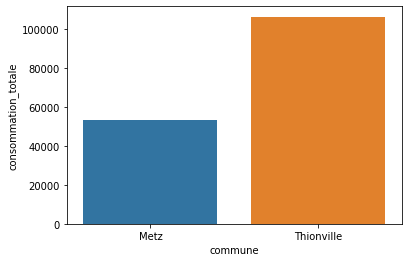

In [5]:
d = {'commune': ['Metz', 'Thionville'],
     'consommation_totale': [moselle_by_address['consommation_totale']['Metz'], 
                             moselle_by_address['consommation_totale']['Thionville']]}
MT = pd.DataFrame(data=d)
sns.barplot(x=MT['commune'], y=MT['consommation_totale'])
plt.show()

On remarque que la consommation de Metz et de Thionville sont beaucoup plus faible que le top 5. De plus, la consommation de Distroff n'est pas renseignée. <br/>
Etrange... 

Afin de confirmer que ce n'est pas un probleme d'echantillonage, nous allons regarder un 2eme departement: celui de l'Yonne.
Sur le site du GICAT, nous avons identifie deux entreprises: Davey Bickford, basee dans la commune de Hery, et Nicolas Industries, dans la commune de Champs-sur-Yonne.

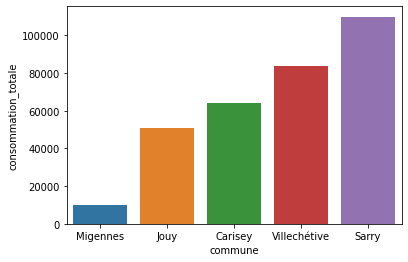

In [6]:
yonne = df[df['departement'] == 'Yonne']
yonne = yonne.dropna(subset=['consommation_totale'])
yonne_by_address = yonne.groupby('commune').mean()
yonne_by_address = yonne_by_address.sort_values(by=['consommation_totale'])
yonne_by_address = yonne_by_address.tail(5)

sns.barplot(x=yonne_by_address.index, y=yonne_by_address['consommation_totale'])
plt.show()

Là aussi les résultats obtenus ne sont pas ce que nous attendions. De plus, la consommation de Héry et de Champs-sur-Yonne de sont pas renseignées.<br/><br/>
De toute evidence, le dataset que nous avons utilise ne contenait pas toutes les informations necessaires pour pouvoir permettre d'avoir des resultats convainquants par l'approche 1. <br/><br/>
Nous devons donc trouver une autre approche!